<a href="https://colab.research.google.com/github/indy1501/ML-and-Deep-Learning/blob/main/Kalman_Filter_and_LSTM_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kalman Filter

In [ ]:
from math import sqrt
#The partial derivative of a matrix is called a Jacobian
def HJacobian_at(x):
    """ compute Jacobian of H matrix at x """

    horiz_dist = x[0]
    altitude   = x[2]
    denom = sqrt(horiz_dist**2 + altitude**2)
    return array ([[horiz_dist/denom, 0., altitude/denom]])

In [ ]:
#The measurement function takes the state estimate of the prior $\bar{\mathbf x}$ and turn it into a measurement of the slant range distance. 
def hx(x):
    """ compute measurement for slant range that
    would correspond to state x.
    """
    
    return (x[0]**2 + x[2]**2) ** 0.5

In [ ]:
from numpy.random import randn
import math

class RadarSim:
    """ Simulates the radar signal returns from an object
    flying at a constant altityude and velocity in 1D. 
    """
    
    def __init__(self, dt, pos, vel, alt):
        self.pos = pos
        self.vel = vel
        self.alt = alt
        self.dt = dt
        
    def get_range(self):
        """ Returns slant range to the object. Call once 
        for each new measurement at dt time from last call.
        """
        
        # add some process noise to the system
        self.vel = self.vel  + .1*randn()
        self.alt = self.alt + .1*randn()
        self.pos = self.pos + self.vel*self.dt
    
        # add measurement noise
        err = self.pos * 0.05*randn()
        slant_dist = math.sqrt(self.pos**2 + self.alt**2)
        
        return slant_dist + err

In [ ]:
!pip install filterpy

     |████████████████████████████████| 184kB 2.8MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-cp36-none-any.whl size=110450 sha256=4fdf461a60203f37be23ff0488c3894525e1f732beb89e687a7703a2682e7fd8
  Stored in directory: /root/.cache/pip/wheels/c3/0c/dd/e92392c3f38a41371602d99fc77d6c1d42aadbf0c6afccdd02
Successfully built filterpy


In [ ]:
from filterpy.common import Q_discrete_white_noise
from filterpy.kalman import ExtendedKalmanFilter
from numpy import eye, array, asarray
import numpy as np

dt = 0.05
#We want to track the position of an aircraft assuming a constant velocity and altitude, and measurements of the slant distance to the aircraft. 
#That means we need 3 state variables - horizontal distance, horizontal velocity, and altitude
rk = ExtendedKalmanFilter(dim_x=3, dim_z=1)
radar = RadarSim(dt, pos=0., vel=100., alt=1000.)

# make an imperfect starting guess
rk.x = array([radar.pos-100, radar.vel+100, radar.alt+1000])

rk.F = eye(3) + array([[0, 1, 0],
                       [0, 0, 0],
                       [0, 0, 0]]) * dt

#The radar measures the range to a target. We will use $\sigma_{range}= 5$ meters for the noise. 
range_std = 5. # meters
rk.R = np.diag([range_std**2])
rk.Q[0:2, 0:2] = Q_discrete_white_noise(2, dt=dt, var=0.1)
rk.Q[2,2] = 0.1
rk.P *= 50

xs, track = [], []
for i in range(int(20/dt)):
    z = radar.get_range()
    track.append((radar.pos, radar.vel, radar.alt))
    
    rk.update(array([z]), HJacobian_at, hx)
    xs.append(rk.x)
    rk.predict()

xs = asarray(xs)
track = asarray(track)
time = np.arange(0, len(xs)*dt, dt)

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

#import kf_book.book_plots as bp
import filterpy.kalman as kf
from math import radians, sin, cos, sqrt, exp
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random

import ipywidgets
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

def plot_track(xs, ys=None, dt=None, label='Track', c='k', lw=2, **kwargs):
    if ys is None and dt is not None:
        ys = xs
        xs = np.arange(0, len(ys)*dt, dt)
    if ys is not None:
        return plt.plot(xs, ys, color=c, lw=lw, ls=':', label=label, **kwargs)
    else:
        return plt.plot(xs, color=c, lw=lw, ls=':', label=label, **kwargs)


def plot_filter(xs, ys=None, dt=None, c='C0', label='Filter', var=None, **kwargs):
    """ plot result of KF with color `c`, optionally displaying the variance
    of `xs`. Returns the list of lines generated by plt.plot()"""

    if ys is None and dt is not None:
        ys = xs
        xs = np.arange(0, len(ys) * dt, dt)
    if ys is None:
        ys = xs
        xs = range(len(ys))

    lines = plt.plot(xs, ys, color=c, label=label, **kwargs)
    if var is None:
        return lines

    var = np.asarray(var)
    std = np.sqrt(var)
    std_top = ys+std
    std_btm = ys-std

    plt.plot(xs, ys+std, linestyle=':', color='k', lw=2)
    plt.plot(xs, ys-std, linestyle=':', color='k', lw=2)
    plt.fill_between(xs, std_btm, std_top,
                     facecolor='yellow', alpha=0.2)

    return lines

def plot_radar(xs, track, time):
    plt.figure()
    plot_track(time, track[:, 0])
    plot_filter(time, xs[:, 0])
    plt.legend(loc=4)
    plt.xlabel('time (sec)')
    plt.ylabel('position (m)')

    plt.figure()
    plot_track(time, track[:, 1])
    plot_filter(time, xs[:, 1])
    plt.legend(loc=4)
    plt.xlabel('time (sec)')
    plt.ylabel('velocity (m/s)')

    plt.figure()
    plot_track(time, track[:, 2])
    plot_filter(time, xs[:, 2])
    plt.ylabel('altitude (m)')
    plt.legend(loc=4)
    plt.xlabel('time (sec)')
    plt.ylim((900, 1600))
    plt.show()

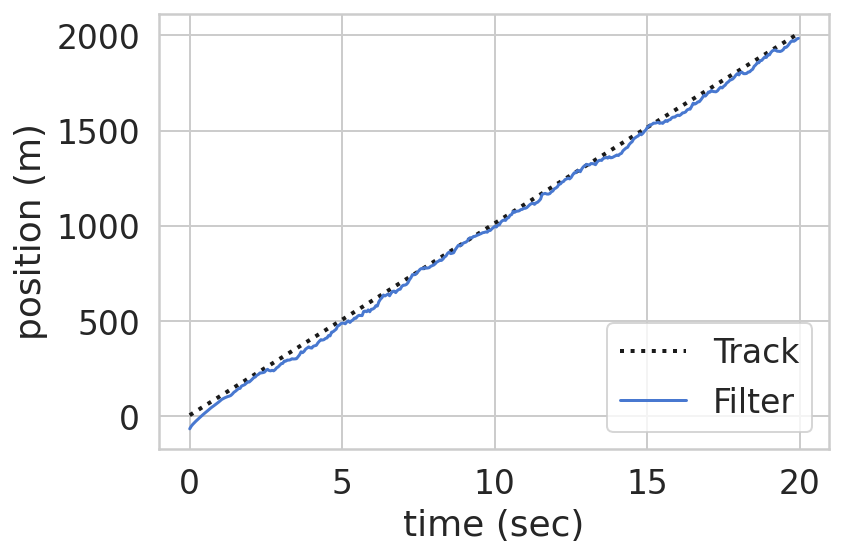

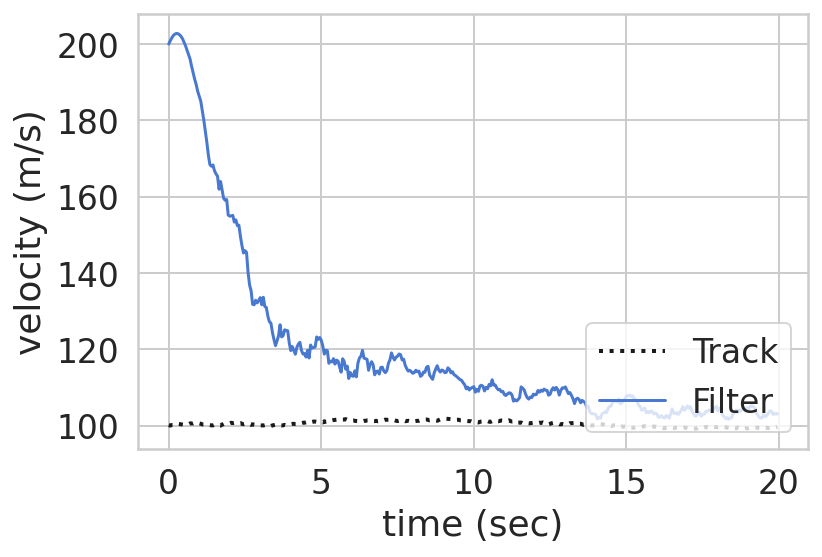

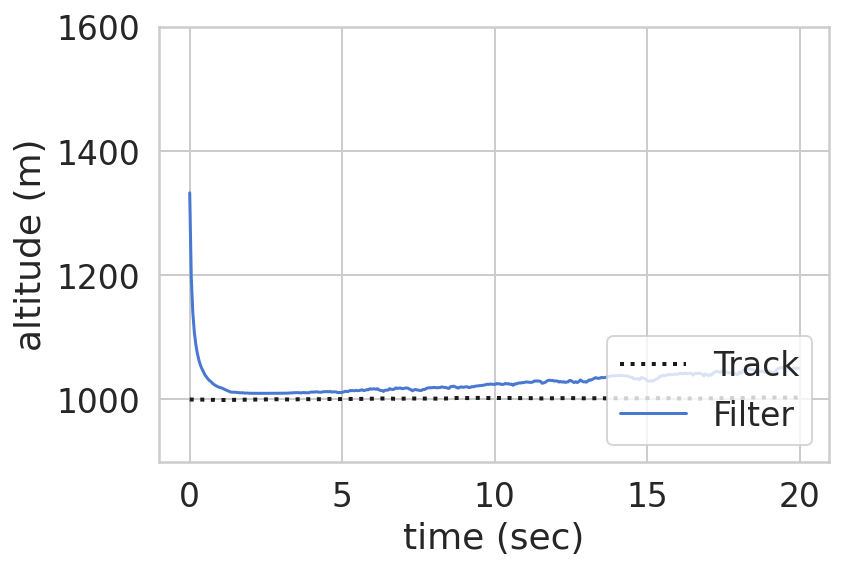

In [ ]:
plot_radar(xs, track, time)

# Simple LSTM for simulation data

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
#Generate simulation data
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

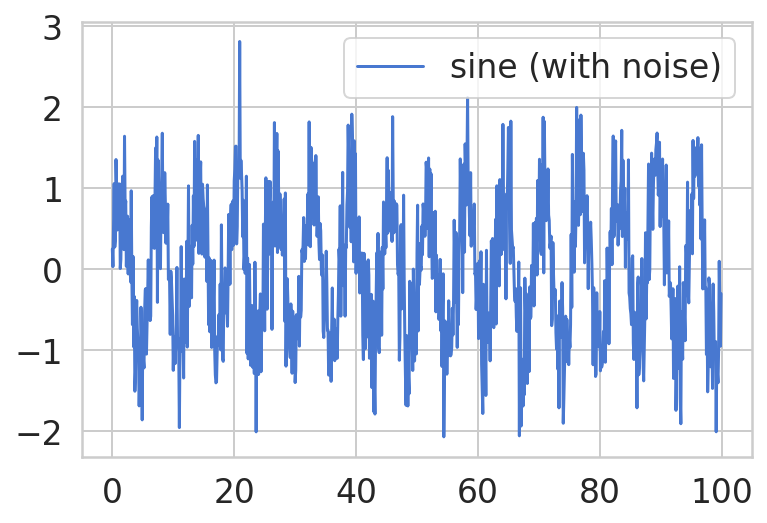

In [ ]:
plt.plot(time, sin, label='sine (with noise)');
plt.legend();

In [ ]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])

In [ ]:
df

sine
0.0   0.248357
0.1   0.030701
0.2   0.522514
0.3   1.057035
0.4   0.272342
...        ...
99.5 -0.998345
99.6  0.096647
99.7 -0.418161
99.8 -0.953178
99.9 -0.303633

[1000 rows x 1 columns]

In [ ]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [ ]:
#“chop the data” into smaller sequences
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)
print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


We have our sequences in the shape (samples, time_steps, features)

In [ ]:
#The LSTM layer expects the number of time steps and the number of features to work properly. The rest of the model looks like a regular regression model.
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False # Do not shuffle the data
)

Epoch 1/30
45/45 [==============================] - 1s 19ms/step - loss: 0.4001 - val_loss: 0.3553
Epoch 2/30
45/45 [==============================] - 0s 10ms/step - loss: 0.3258 - val_loss: 0.3224
Epoch 3/30
45/45 [==============================] - 0s 10ms/step - loss: 0.3192 - val_loss: 0.3202
Epoch 4/30
45/45 [==============================] - 0s 10ms/step - loss: 0.3181 - val_loss: 0.3177
Epoch 5/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3172 - val_loss: 0.3159
Epoch 6/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3164 - val_loss: 0.3145
Epoch 7/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3157 - val_loss: 0.3132
Epoch 8/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3150 - val_loss: 0.3119
Epoch 9/30
45/45 [==============================] - 0s 10ms/step - loss: 0.3143 - val_loss: 0.3107
Epoch 10/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3136 - val_loss: 0.3095
Epoch 11/30
45

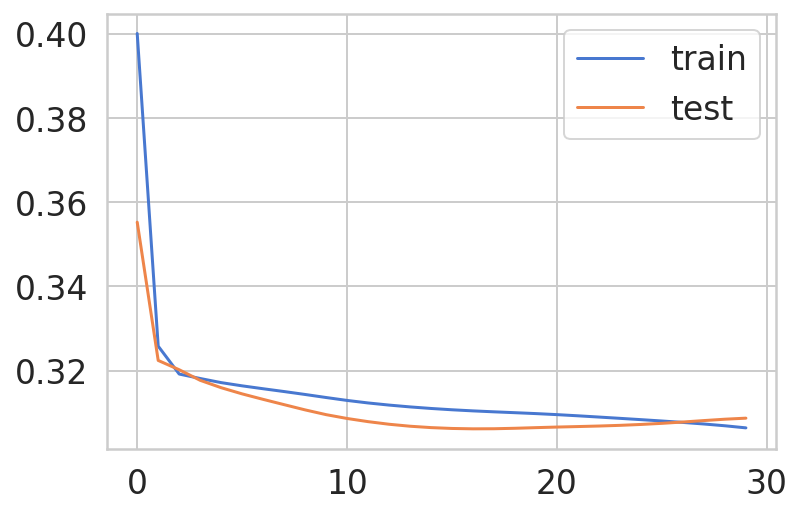

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
y_pred = model.predict(X_test)

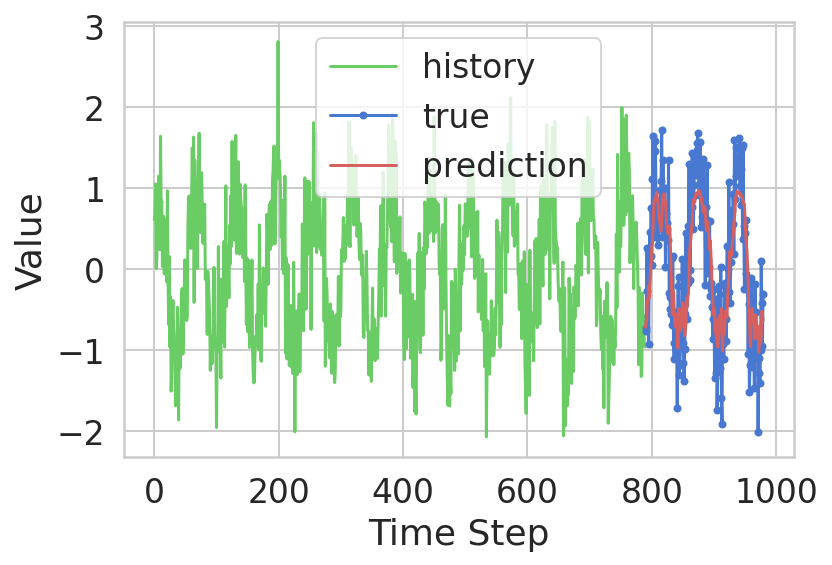

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

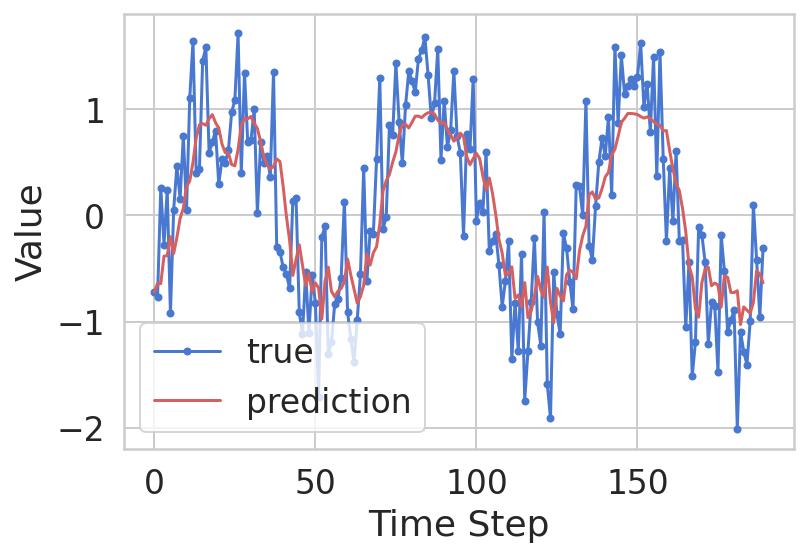

In [ ]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

# Walmart M5 forcasting
https://www.kaggle.com/c/m5-forecasting-accuracy/overview

The goal: We have been challenged to predict sales data provided by the retail giant Walmart 28 days into the future. This competition will run in 2 tracks: In addition to forecasting the values themselves in the Forecasting competition, we are simultaneously tasked to estimate the uncertainty of our predictions in the Uncertainty Distribution competition. Both competitions will have the same 28 day forecast horizon.

The data: We are working with 42,840 hierarchical time series. The data were obtained in the 3 US states of California (CA), Texas (TX), and Wisconsin (WI). “Hierarchical” here means that data can be aggregated on different levels: item level, department level, product category level, and state level. The sales information reaches back from Jan 2011 to June 2016. In addition to the sales numbers, we are also given corresponding data on prices, promotions, and holidays. Note, that we have been warned that most of the time series contain zero values.

The data comprises 3049 individual products from 3 categories and 7 departments, sold in 10 stores in 3 states. The hierachical aggregation captures the combinations of these factors. For instance, we can create 1 time series for all sales, 3 time series for all sales per state, and so on. The largest category is sales of all individual 3049 products per 10 stores for 30490 time series.

The training data comes in the shape of 3 separate files:

sales_train.csv: this is our main training data. It has 1 column for each of the 1941 days from 2011-01-29 and 2016-05-22; not including the validation period of 28 days until 2016-06-19. It also includes the IDs for item, department, category, store, and state. The number of rows is 30490 for all combinations of 30490 items and 10 stores.

sell_prices.csv: the store and item IDs together with the sales price of the item as a weekly average.

calendar.csv: dates together with related features like day-of-the week, month, year, and an 3 binary flags for whether the stores in each state allowed purchases with SNAP food stamps at this date (1) or not (0).

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


connect to Kaggle, Tutorial ref: https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a

Go to your Kaggle account page (the drop-down menu in the top right corner) Scroll down to API and hit “Create New API Token.” That’s going to download a file called kaggle.json.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/Kaggle"

In [ ]:
!kaggle datasets list #access a list of Kaggle datasets.

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  429KB  2020-11-16 22:16:00           4623  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           2461  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          2MB  2020-11-16 06:04:17           1679  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            451  
etsc9287/2020-general-election-polls                    Election, COVID, and Demographic Data by Cou

In [ ]:
!pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.9)


https://www.kaggle.com/c/m5-forecasting-accuracy/data

In [ ]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 58.8MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 56.1MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 22.3MB/s]


In [ ]:
!kaggle competitions download -c m5-forecasting-accuracy

403 - Forbidden


In [ ]:
!ls '/content/gdrive/My Drive/Colab Notebooks/Kaggle/'

casting_data  m5-forecasting-accuracy.zip  saved_models
kaggle.json   mymodel0.h5		   traininghistory.pdf


In [ ]:
!cp '/content/gdrive/My Drive/Colab Notebooks/Kaggle/m5-forecasting-accuracy.zip' .

In [ ]:
!ls

gdrive	m5-forecasting-accuracy.zip  sample_data


In [ ]:
!unzip m5-forecasting-accuracy.zip

Archive:  m5-forecasting-accuracy.zip
  inflating: calendar.csv            
  inflating: sales_train_evaluation.csv  
  inflating: sales_train_validation.csv  
  inflating: sample_submission.csv   
  inflating: sell_prices.csv         


In [ ]:
#Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pywt
import plotly.express as px

In [ ]:
#Importing the dataset
DIR = '.'
df_calendar = pd.read_csv(DIR+'/calendar.csv')
df_sales_train_evaluation = pd.read_csv(DIR+'/sales_train_evaluation.csv')
df_sales_train_validation = pd.read_csv(DIR+'/sales_train_validation.csv')
df_sell_prices = pd.read_csv(DIR+'/sell_prices.csv')

The dataset consists of five .csv files.

calendar.csv - Contains the dates on which products are sold. The dates are in a yyyy/dd/mm format.

sales_train_validation.csv - Contains the historical daily unit sales data per product and store [d_1 - d_1913].

submission.csv - Demonstrates the correct format for submission to the competition.

sell_prices.csv - Contains information about the price of the products sold per store and date.

sales_train_evaluation.csv - Available one month before the competition deadline. It will include sales for [d_1 - d_1941].

In this competition, we need to forecast the sales for [d_1942 - d_1969]. These rows form the evaluation set. The rows [d_1914 - d_1941] form the validation set, and the remaining rows form the training set. Now, since we understand the dataset and know what to predict, let us visualize the dataset.

In [ ]:
df_calendar.head(30)

date  wm_yr_wk    weekday  ...  snap_CA  snap_TX  snap_WI
0   2011-01-29     11101   Saturday  ...        0        0        0
1   2011-01-30     11101     Sunday  ...        0        0        0
2   2011-01-31     11101     Monday  ...        0        0        0
3   2011-02-01     11101    Tuesday  ...        1        1        0
4   2011-02-02     11101  Wednesday  ...        1        0        1
5   2011-02-03     11101   Thursday  ...        1        1        1
6   2011-02-04     11101     Friday  ...        1        0        0
7   2011-02-05     11102   Saturday  ...        1        1        1
8   2011-02-06     11102     Sunday  ...        1        1        1
9   2011-02-07     11102     Monday  ...        1        1        0
10  2011-02-08     11102    Tuesday  ...        1        0        1
11  2011-02-09     11102  Wednesday  ...        1        1        1
12  2011-02-10     11102   Thursday  ...        1        0        0
13  2011-02-11     11102     Friday  ...        0        1        1
14  2011-02-12     11103   Saturday  ...        0        1        1
15  2011-02-13     11103     Sunday  ...        0        1        0
16  2011-02-14     11103     Monday  ...        0        0        1
17  2011-02-15     11103    Tuesday  ...        0        1        1
18  2011-02-16     11103  Wednesday  ...        0        0        0
19  2011-02-17     11103   Thursday  ...        0        0        0
20  2011-02-18     11103     Friday  ...        0        0        0
21  2011-02-19     11104   Saturday  ...        0        0        0
22  2011-02-20     11104     Sunday  ...        0        0        0
23  2011-02-21     11104     Monday  ...        0        0        0
24  2011-02-22     11104    Tuesday  ...        0        0        0
25  2011-02-23     11104  Wednesday  ...        0        0        0
26  2011-02-24     11104   Thursday  ...        0        0        0
27  2011-02-25     11104     Friday  ...        0        0        0
28  2011-02-26     11105   Saturday  ...        0        0        0
29  2011-02-27     11105     Sunday  ...        0        0        0

[30 rows x 14 columns]

In [ ]:
df_sales_train_evaluation.head(30)

id        item_id  ... d_1940 d_1941
0   HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  ...      0      1
1   HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  ...      0      0
2   HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  ...      0      1
3   HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  ...      2      6
4   HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  ...      1      0
5   HOBBIES_1_006_CA_1_evaluation  HOBBIES_1_006  ...      2      0
6   HOBBIES_1_007_CA_1_evaluation  HOBBIES_1_007  ...      1      0
7   HOBBIES_1_008_CA_1_evaluation  HOBBIES_1_008  ...     40     32
8   HOBBIES_1_009_CA_1_evaluation  HOBBIES_1_009  ...      1      0
9   HOBBIES_1_010_CA_1_evaluation  HOBBIES_1_010  ...      0      1
10  HOBBIES_1_011_CA_1_evaluation  HOBBIES_1_011  ...      0      0
11  HOBBIES_1_012_CA_1_evaluation  HOBBIES_1_012  ...      1      0
12  HOBBIES_1_013_CA_1_evaluation  HOBBIES_1_013  ...      1      1
13  HOBBIES_1_014_CA_1_evaluation  HOBBIES_1_014  ...      1      3
14  HOBBIES_1_015_CA_1_evaluation  HOBBIES_1_015  ...      5      4
15  HOBBIES_1_016_CA_1_evaluation  HOBBIES_1_016  ...     12      6
16  HOBBIES_1_017_CA_1_evaluation  HOBBIES_1_017  ...      2      0
17  HOBBIES_1_018_CA_1_evaluation  HOBBIES_1_018  ...      1      0
18  HOBBIES_1_019_CA_1_evaluation  HOBBIES_1_019  ...     14     11
19  HOBBIES_1_020_CA_1_evaluation  HOBBIES_1_020  ...      0      0
20  HOBBIES_1_021_CA_1_evaluation  HOBBIES_1_021  ...      0      0
21  HOBBIES_1_022_CA_1_evaluation  HOBBIES_1_022  ...      0      1
22  HOBBIES_1_023_CA_1_evaluation  HOBBIES_1_023  ...      0      2
23  HOBBIES_1_024_CA_1_evaluation  HOBBIES_1_024  ...      2      0
24  HOBBIES_1_025_CA_1_evaluation  HOBBIES_1_025  ...      0      0
25  HOBBIES_1_026_CA_1_evaluation  HOBBIES_1_026  ...      1      1
26  HOBBIES_1_027_CA_1_evaluation  HOBBIES_1_027  ...      1      1
27  HOBBIES_1_028_CA_1_evaluation  HOBBIES_1_028  ...      0      0
28  HOBBIES_1_029_CA_1_evaluation  HOBBIES_1_029  ...      0      3
29  HOBBIES_1_030_CA_1_evaluation  HOBBIES_1_030  ...     17      6

[30 rows x 1947 columns]

In [ ]:
df_sell_prices.head(30)

store_id        item_id  wm_yr_wk  sell_price
0      CA_1  HOBBIES_1_001     11325        9.58
1      CA_1  HOBBIES_1_001     11326        9.58
2      CA_1  HOBBIES_1_001     11327        8.26
3      CA_1  HOBBIES_1_001     11328        8.26
4      CA_1  HOBBIES_1_001     11329        8.26
5      CA_1  HOBBIES_1_001     11330        8.26
6      CA_1  HOBBIES_1_001     11331        8.26
7      CA_1  HOBBIES_1_001     11332        8.26
8      CA_1  HOBBIES_1_001     11333        8.26
9      CA_1  HOBBIES_1_001     11334        8.26
10     CA_1  HOBBIES_1_001     11335        8.26
11     CA_1  HOBBIES_1_001     11336        8.26
12     CA_1  HOBBIES_1_001     11337        8.26
13     CA_1  HOBBIES_1_001     11338        8.26
14     CA_1  HOBBIES_1_001     11339        8.26
15     CA_1  HOBBIES_1_001     11340        8.26
16     CA_1  HOBBIES_1_001     11341        8.26
17     CA_1  HOBBIES_1_001     11342        8.26
18     CA_1  HOBBIES_1_001     11343        8.26
19     CA_1  HOBBIES_1_001     11344        8.26
20     CA_1  HOBBIES_1_001     11345        8.26
21     CA_1  HOBBIES_1_001     11346        8.26
22     CA_1  HOBBIES_1_001     11347        8.26
23     CA_1  HOBBIES_1_001     11348        8.26
24     CA_1  HOBBIES_1_001     11349        8.26
25     CA_1  HOBBIES_1_001     11350        8.26
26     CA_1  HOBBIES_1_001     11351        8.26
27     CA_1  HOBBIES_1_001     11352        8.26
28     CA_1  HOBBIES_1_001     11353        8.26
29     CA_1  HOBBIES_1_001     11401        8.26

## Demand Vs Sell Price

In [ ]:
#day wise
sales_train_validation_melt = pd.melt(df_sales_train_validation, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='day', value_name='demand')

In [ ]:
sales_CA_1 = sales_train_validation_melt[sales_train_validation_melt.store_id == "CA_1"]
new_CA_1 = pd.merge(sales_CA_1, df_calendar, left_on="day", right_on="d", how="left")
new_CA_1 = pd.merge(new_CA_1, df_sell_prices, left_on=["store_id", "item_id", "wm_yr_wk"],right_on=["store_id", "item_id", "wm_yr_wk"], how="left")
new_CA_1["day_int"] = new_CA_1.day.apply(lambda x: int(x.split("_")[-1]))

In [ ]:
day_sum = new_CA_1.groupby("day_int")[["sell_price", "demand"]].agg("sum").reset_index()

In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(x=day_sum.day_int, 
                         y=day_sum.demand,
                         #showlegend=False,
                         mode="lines",
                         name="demand",
                         #marker=dict(color="mediumseagreen"),
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=day_sum.day_int, 
                         y=day_sum.sell_price,
                         #showlegend=False,
                         mode="lines",
                         name="sell_price",
                         #marker=dict(color="mediumseagreen")
                         ),
             
              row=2,col=1           
              )

fig.update_layout(height=1000, title_text="Demand  and Sell_price")
fig.show()

Weekend Vs Weekday

In [ ]:
# For each item week_days vs week_ends over days sell_price and demand

week_end = new_CA_1[new_CA_1.weekday == "Sunday"]
week_day = new_CA_1[new_CA_1.weekday != "Sunday"]

week_end = week_end.groupby("item_id")[["demand", "sell_price"]].agg(["mean", "max"]).reset_index()
week_end.columns = ['_'.join(col).strip() for col in week_end.columns.values]

week_day = week_day.groupby("item_id")[["demand", "sell_price"]].agg(["mean", "max"]).reset_index()
week_day.columns = ['_'.join(col).strip() for col in week_day.columns.values]

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=week_end["item_id_"],
                         y=week_end["demand_mean"],
                         mode="lines",
                         name="week_day"

))

fig.add_trace(go.Scatter(x=week_end["item_id_"],
                         y=week_day["demand_mean"],
                         mode="lines",
                         name="normal_day"

))

fig.update_layout(height=500, title_text="Demand")
fig.show()

In [ ]:
#Event Days
events = new_CA_1[~new_CA_1.event_name_1.isna()]
events = events.groupby("event_name_1")[["demand", "sell_price"]].agg(["mean", "max"]).reset_index()
events.columns = ['_'.join(col).strip() for col in events.columns.values]

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=events["event_name_1_"],
                         y=events["demand_mean"],
                         mode="lines",
                         name="week_day"
))

fig.update_layout(height=500, title_text="Demand")
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=events["event_name_1_"],
                         y=events["sell_price_mean"],
                         mode="lines",
                         name="week_day"

))

fig.update_layout(height=500, title_text="Sell_price")
fig.show()

In [ ]:
## Number of items contain each Category

def n_unique(series):
    return series.nunique()

Category_count = new_CA_1.groupby("cat_id")["item_id"].agg(n_unique).reset_index()

fig = px.bar(Category_count, y="item_id", x="cat_id", color="cat_id", title="Category Item Count")

fig.update_layout(height=500, width=600)
fig.show()

In [ ]:
## For each category mean of demand and sell_price

Category = new_CA_1.groupby(["day_int","cat_id"])[["demand", "sell_price"]].agg(["mean", "max"]).reset_index()
Category.columns = ['_'.join(col).strip() for col in Category.columns.values]

FOODS = Category[Category.cat_id_ == "FOODS"]
HOBBIES = Category[Category.cat_id_ == "HOBBIES"]
HOUSEHOLD = Category[Category.cat_id_ == "HOUSEHOLD"]

fig = make_subplots(rows=1, cols=1)


fig.add_trace(go.Scatter(x=FOODS["day_int_"], 
                         y=FOODS["demand_mean"],
                         #showlegend=Ture,
                         mode="lines",
                         name="FOODS",
                         #marker=dict(color="mediumseagreen")
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=HOBBIES["day_int_"], 
                         y=HOBBIES["demand_mean"],
                         #showlegend=Ture,
                         mode="lines",
                         name="HOBBIES",
                         #marker=dict(color="yellow")
                         ),
             
              row=1,col=1           
              )

fig.add_trace(go.Scatter(x=HOUSEHOLD["day_int_"], 
                         y=HOUSEHOLD["demand_mean"],
                         #showlegend=Ture,
                         mode="lines",
                         name="HOUSEHOLD",
                         #marker=dict(color="blue")
                         ),
             
              row=1,col=1           
              )

fig.update_layout(height=500, title_text="Demand Mean Over Category by day-by-day")
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=1)


fig.add_trace(go.Scatter(x=FOODS["day_int_"], 
                         y=FOODS["sell_price_mean"],
                         #showlegend=Ture,
                         mode="lines",
                         name="FOODS",
                         #marker=dict(color="mediumseagreen")
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=HOBBIES["day_int_"], 
                         y=HOBBIES["sell_price_mean"],
                         #showlegend=Ture,
                         mode="lines",
                         name="HOBBIES",
                         #marker=dict(color="yellow")
                         ),
             
              row=1,col=1           
              )

fig.add_trace(go.Scatter(x=HOUSEHOLD["day_int_"], 
                         y=HOUSEHOLD["sell_price_mean"],
                         #showlegend=Ture,
                         mode="lines",
                         name="HOUSEHOLD",
                         #marker=dict(color="blue")
                         ),
             
              row=1,col=1           
              )

fig.update_layout(height=500, title_text="Sell_price Mean Over Category by day-by-day")
fig.show()

Sales

In [ ]:
ids = sorted(list(set(df_sales_train_validation['id'])))
d_cols = [c for c in df_sales_train_validation.columns if 'd_' in c]
x_1 = df_sales_train_validation.loc[df_sales_train_validation['id'] == ids[2]].set_index('id')[d_cols].values[0]
x_2 = df_sales_train_validation.loc[df_sales_train_validation['id'] == ids[1]].set_index('id')[d_cols].values[0]
x_3 = df_sales_train_validation.loc[df_sales_train_validation['id'] == ids[17]].set_index('id')[d_cols].values[0]

fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_1)), y=x_1, showlegend=False,
                    mode='lines', name="First sample",
                         marker=dict(color="mediumseagreen")),
             row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_2)), y=x_2, showlegend=False,
                    mode='lines', name="Second sample",
                         marker=dict(color="violet")),
             row=2, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_3)), y=x_3, showlegend=False,
                    mode='lines', name="Third sample",
                         marker=dict(color="dodgerblue")),
             row=3, col=1)

fig.update_layout(height=1200, width=800, title_text="Sample sales")
fig.show()

In [ ]:
ids = sorted(list(set(df_sales_train_validation['id'])))
d_cols = [c for c in df_sales_train_validation.columns if 'd_' in c]
x_1 = df_sales_train_validation.loc[df_sales_train_validation['id'] == ids[0]].set_index('id')[d_cols].values[0][:90]
x_2 = df_sales_train_validation.loc[df_sales_train_validation['id'] == ids[4]].set_index('id')[d_cols].values[0][1300:1400]
x_3 = df_sales_train_validation.loc[df_sales_train_validation['id'] == ids[65]].set_index('id')[d_cols].values[0][350:450]
fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_1)), y=x_1, showlegend=False,
                    mode='lines+markers', name="First sample",
                         marker=dict(color="mediumseagreen")),
             row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_2)), y=x_2, showlegend=False,
                    mode='lines+markers', name="Second sample",
                         marker=dict(color="violet")),
             row=2, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_3)), y=x_3, showlegend=False,
                    mode='lines+markers', name="Third sample",
                         marker=dict(color="dodgerblue")),
             row=3, col=1)

fig.update_layout(height=1200, width=800, title_text="Sample sales snippets")
fig.show()

In [ ]:
#Denoising

def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def denoise_signal(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * maddest(coeff[-level])

    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

    return pywt.waverec(coeff, wavelet, mode='per')

In [ ]:
y_w1 = denoise_signal(x_1)
y_w2 = denoise_signal(x_2)
y_w3 = denoise_signal(x_3)


fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), mode='lines+markers', y=x_1, marker=dict(color="mediumaquamarine"), showlegend=False,
               name="Original signal"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), y=y_w1, mode='lines', marker=dict(color="darkgreen"), showlegend=False,
               name="Denoised signal"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), mode='lines+markers', y=x_2, marker=dict(color="thistle"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), y=y_w2, mode='lines', marker=dict(color="purple"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), mode='lines+markers', y=x_3, marker=dict(color="lightskyblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), y=y_w3, mode='lines', marker=dict(color="navy"), showlegend=False),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Original (pale) vs. Denoised (dark) sales")
fig.show()

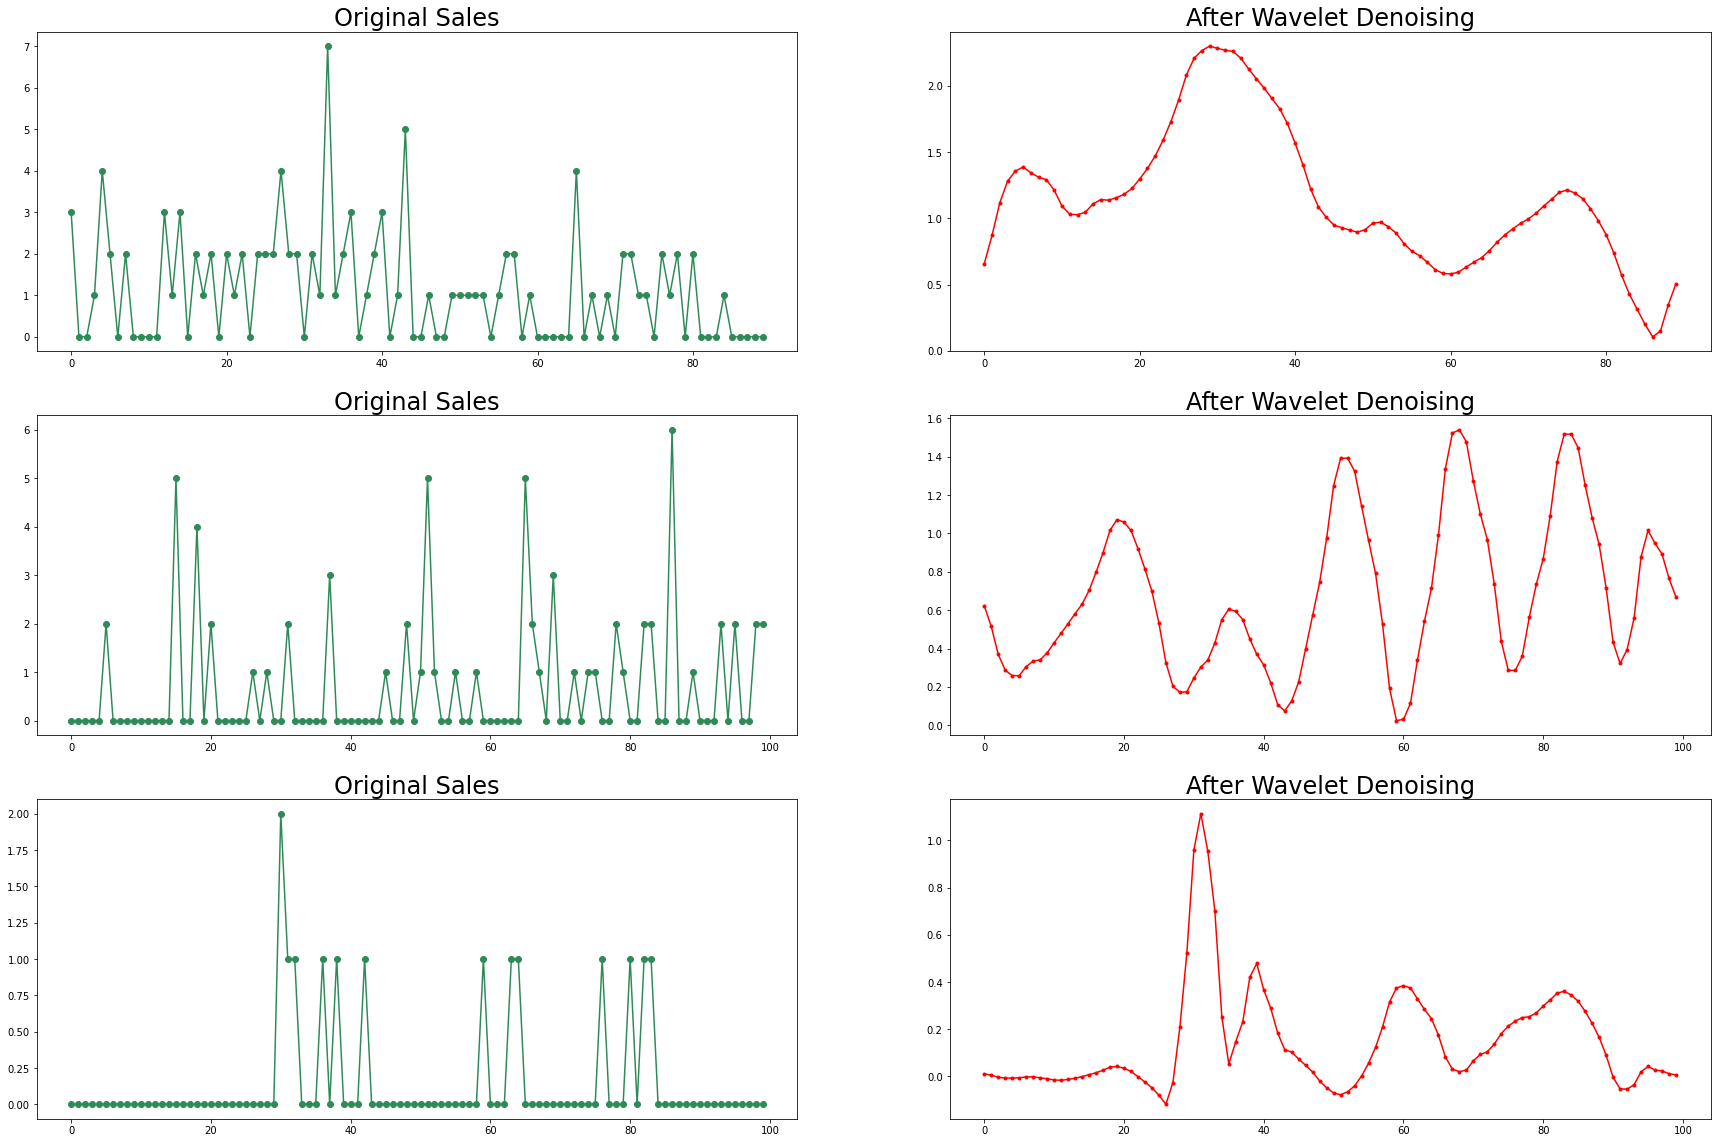

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))

ax[0, 0].plot(x_1, color='seagreen', marker='o') 
ax[0, 0].set_title('Original Sales', fontsize=24)
ax[0, 1].plot(y_w1, color='red', marker='.') 
ax[0, 1].set_title('After Wavelet Denoising', fontsize=24)

ax[1, 0].plot(x_2, color='seagreen', marker='o') 
ax[1, 0].set_title('Original Sales', fontsize=24)
ax[1, 1].plot(y_w2, color='red', marker='.') 
ax[1, 1].set_title('After Wavelet Denoising', fontsize=24)

ax[2, 0].plot(x_3, color='seagreen', marker='o') 
ax[2, 0].set_title('Original Sales', fontsize=24)
ax[2, 1].plot(y_w3, color='red', marker='.') 
ax[2, 1].set_title('After Wavelet Denoising', fontsize=24)

plt.show()

In [ ]:
def average_smoothing(signal, kernel_size=3, stride=1):
    sample = []
    start = 0
    end = kernel_size
    while end <= len(signal):
        start = start + stride
        end = end + stride
        sample.extend(np.ones(end - start)*np.mean(signal[start:end]))
    return np.array(sample)


In [ ]:
y_a1 = average_smoothing(x_1)
y_a2 = average_smoothing(x_2)
y_a3 = average_smoothing(x_3)

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), mode='lines+markers', y=x_1, marker=dict(color="lightskyblue"), showlegend=False,
               name="Original sales"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), y=y_a1, mode='lines', marker=dict(color="navy"), showlegend=False,
               name="Denoised sales"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), mode='lines+markers', y=x_2, marker=dict(color="thistle"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), y=y_a2, mode='lines', marker=dict(color="indigo"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), mode='lines+markers', y=x_3, marker=dict(color="mediumaquamarine"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), y=y_a3, mode='lines', marker=dict(color="darkgreen"), showlegend=False),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Original (pale) vs. Denoised (dark) signals")
fig.show()

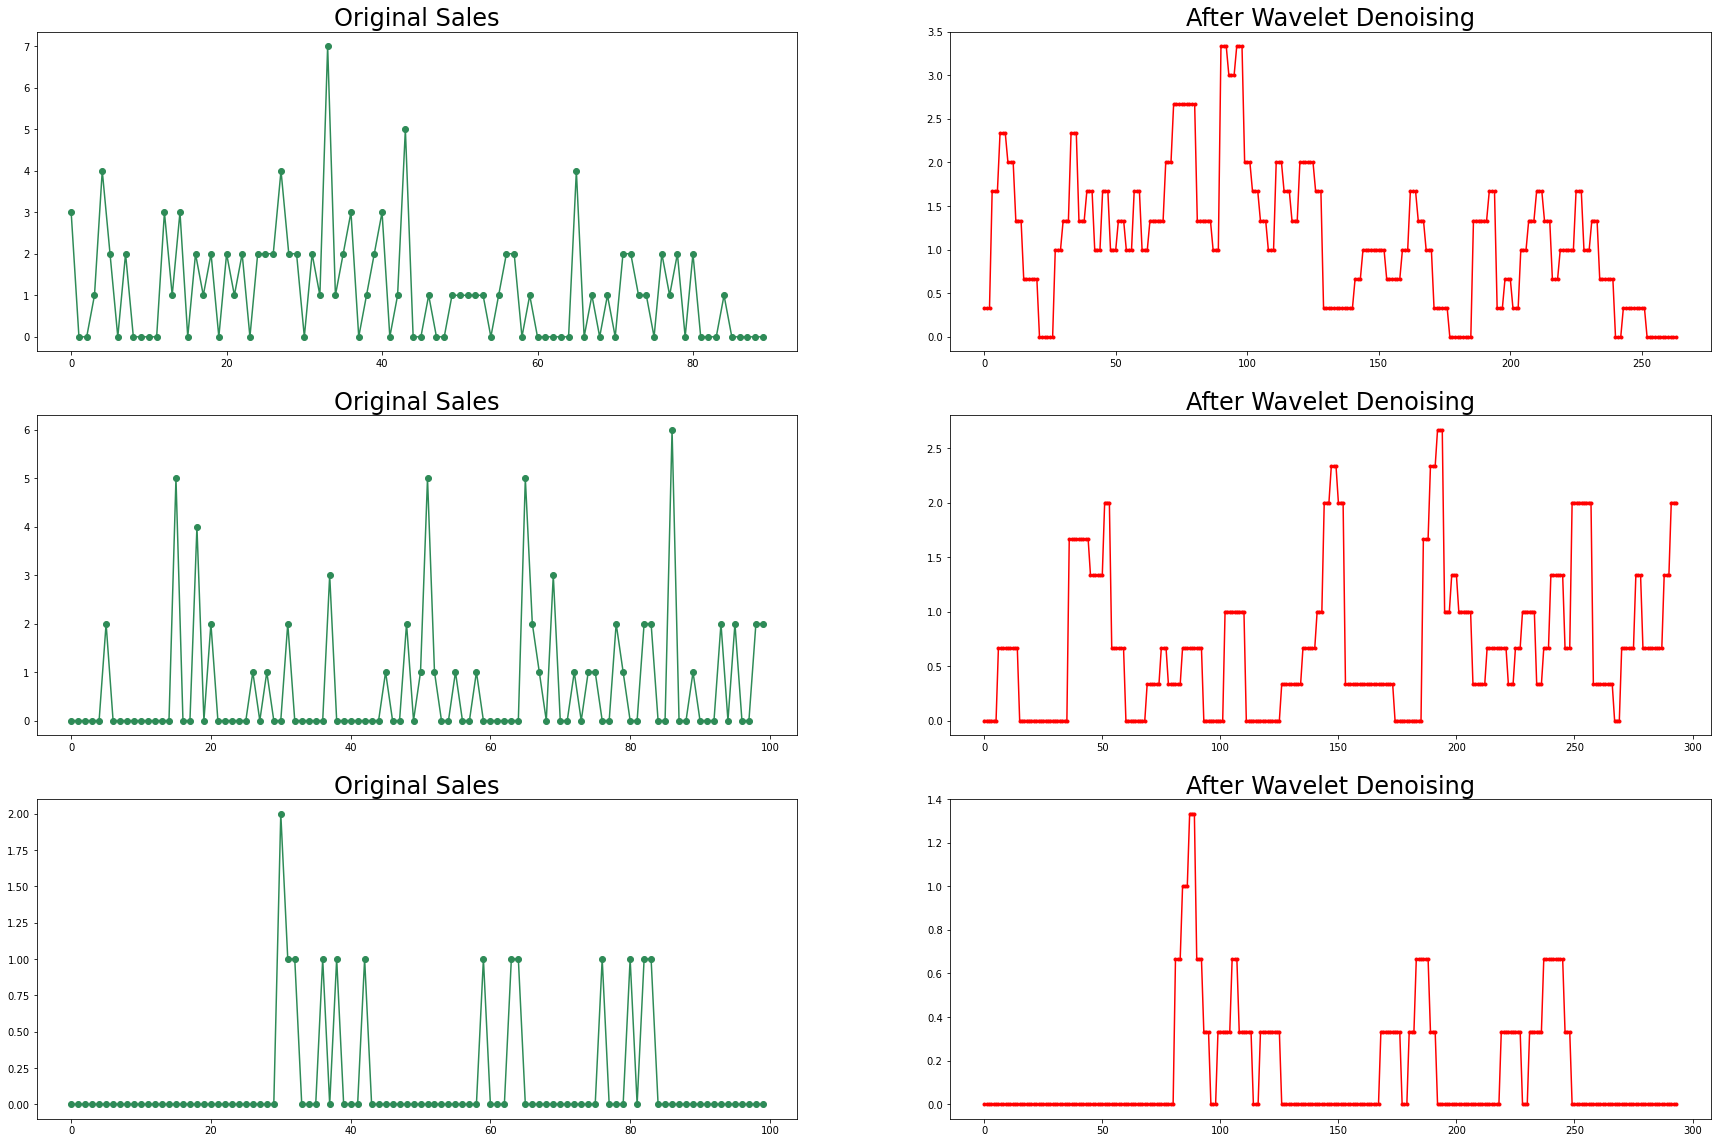

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))

ax[0, 0].plot(x_1, color='seagreen', marker='o') 
ax[0, 0].set_title('Original Sales', fontsize=24)
ax[0, 1].plot(y_a1, color='red', marker='.') 
ax[0, 1].set_title('After Wavelet Denoising', fontsize=24)

ax[1, 0].plot(x_2, color='seagreen', marker='o') 
ax[1, 0].set_title('Original Sales', fontsize=24)
ax[1, 1].plot(y_a2, color='red', marker='.') 
ax[1, 1].set_title('After Wavelet Denoising', fontsize=24)

ax[2, 0].plot(x_3, color='seagreen', marker='o') 
ax[2, 0].set_title('Original Sales', fontsize=24)
ax[2, 1].plot(y_a3, color='red', marker='.') 
ax[2, 1].set_title('After Wavelet Denoising', fontsize=24)

plt.show()

In [ ]:
past_sales = df_sales_train_validation.set_index('id')[d_cols] \
    .T \
    .merge(df_calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

store_list = df_sell_prices['store_id'].unique()
means = []
fig = go.Figure()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    means.append(np.mean(past_sales[store_items].sum(axis=1)))
    fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (per store)")

In [ ]:

for i, s in enumerate(store_list):
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Box(x=[s]*len(data), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Store name ")

In [ ]:
df = pd.DataFrame(np.transpose([means, store_list]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name")

California store

In [ ]:
greens = ["mediumaquamarine", "mediumseagreen", "seagreen", "green"]
store_list = df_sell_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "ca" in s or "CA" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s, marker=dict(color=greens[i])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (California)")

In [ ]:
fig = go.Figure()

for i, s in enumerate(store_list):
    if "ca" in s or "CA" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Box(x=[s]*len(data), y=data, name=s, marker=dict(color=greens[i])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Store name (California)")

In [ ]:
df = pd.DataFrame(np.transpose([means, stores]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name", color_continuous_scale=greens)


fig = go.Figure(data=[
    go.Bar(name='', x=stores, y=means, marker={'color' : greens})])

fig.update_layout(title="Mean sales vs. Store name (California)", yaxis=dict(title="Mean sales"), xaxis=dict(title="Store name"))
fig.update_layout(barmode='group')
fig.show()

## LSTM Model

M5 Forecasting - Accuracy, Estimate the unit sales of Walmart retail goods

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.impute import SimpleImputer
import fbprophet
from itertools import cycle
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import mean_squared_error
from keras.layers import BatchNormalization
from keras.layers import LSTM

In [ ]:
DIR='.'
calendar= pd.read_csv(DIR+'/calendar.csv')
prices= pd.read_csv(DIR+'/sell_prices.csv')
sales_train_evaluation= pd.read_csv(DIR+'/sales_train_evaluation.csv')

In [ ]:
print("Calendar shape: ", calendar.shape)
print("prices shape: ",prices.shape)
print("sales shape : ", sales_train_evaluation.shape)
#print("sales validation shape: " , sales_train_validation.shape)

Calendar shape:  (1969, 14)
prices shape:  (6841121, 4)
sales shape :  (30490, 1947)


In [ ]:
#Downcast in order to save memory
def transform (df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        '''elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')'''
    return df  

sales_train_evaluation = transform(sales_train_evaluation)
prices = transform(prices)

In [ ]:
calendar.head(20)

date  wm_yr_wk    weekday  ...  snap_CA  snap_TX  snap_WI
0   2011-01-29     11101   Saturday  ...        0        0        0
1   2011-01-30     11101     Sunday  ...        0        0        0
2   2011-01-31     11101     Monday  ...        0        0        0
3   2011-02-01     11101    Tuesday  ...        1        1        0
4   2011-02-02     11101  Wednesday  ...        1        0        1
5   2011-02-03     11101   Thursday  ...        1        1        1
6   2011-02-04     11101     Friday  ...        1        0        0
7   2011-02-05     11102   Saturday  ...        1        1        1
8   2011-02-06     11102     Sunday  ...        1        1        1
9   2011-02-07     11102     Monday  ...        1        1        0
10  2011-02-08     11102    Tuesday  ...        1        0        1
11  2011-02-09     11102  Wednesday  ...        1        1        1
12  2011-02-10     11102   Thursday  ...        1        0        0
13  2011-02-11     11102     Friday  ...        0        1        1
14  2011-02-12     11103   Saturday  ...        0        1        1
15  2011-02-13     11103     Sunday  ...        0        1        0
16  2011-02-14     11103     Monday  ...        0        0        1
17  2011-02-15     11103    Tuesday  ...        0        1        1
18  2011-02-16     11103  Wednesday  ...        0        0        0
19  2011-02-17     11103   Thursday  ...        0        0        0

[20 rows x 14 columns]

In [ ]:
prices.head(20)

store_id        item_id  wm_yr_wk  sell_price
0      CA_1  HOBBIES_1_001     11325    9.578125
1      CA_1  HOBBIES_1_001     11326    9.578125
2      CA_1  HOBBIES_1_001     11327    8.257812
3      CA_1  HOBBIES_1_001     11328    8.257812
4      CA_1  HOBBIES_1_001     11329    8.257812
5      CA_1  HOBBIES_1_001     11330    8.257812
6      CA_1  HOBBIES_1_001     11331    8.257812
7      CA_1  HOBBIES_1_001     11332    8.257812
8      CA_1  HOBBIES_1_001     11333    8.257812
9      CA_1  HOBBIES_1_001     11334    8.257812
10     CA_1  HOBBIES_1_001     11335    8.257812
11     CA_1  HOBBIES_1_001     11336    8.257812
12     CA_1  HOBBIES_1_001     11337    8.257812
13     CA_1  HOBBIES_1_001     11338    8.257812
14     CA_1  HOBBIES_1_001     11339    8.257812
15     CA_1  HOBBIES_1_001     11340    8.257812
16     CA_1  HOBBIES_1_001     11341    8.257812
17     CA_1  HOBBIES_1_001     11342    8.257812
18     CA_1  HOBBIES_1_001     11343    8.257812
19     CA_1  HOBBIES_1_001     11344    8.257812

In [ ]:
sales_train_evaluation.head(20)

id        item_id  ... d_1940 d_1941
0   HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  ...      0      1
1   HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  ...      0      0
2   HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  ...      0      1
3   HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  ...      2      6
4   HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  ...      1      0
5   HOBBIES_1_006_CA_1_evaluation  HOBBIES_1_006  ...      2      0
6   HOBBIES_1_007_CA_1_evaluation  HOBBIES_1_007  ...      1      0
7   HOBBIES_1_008_CA_1_evaluation  HOBBIES_1_008  ...     40     32
8   HOBBIES_1_009_CA_1_evaluation  HOBBIES_1_009  ...      1      0
9   HOBBIES_1_010_CA_1_evaluation  HOBBIES_1_010  ...      0      1
10  HOBBIES_1_011_CA_1_evaluation  HOBBIES_1_011  ...      0      0
11  HOBBIES_1_012_CA_1_evaluation  HOBBIES_1_012  ...      1      0
12  HOBBIES_1_013_CA_1_evaluation  HOBBIES_1_013  ...      1      1
13  HOBBIES_1_014_CA_1_evaluation  HOBBIES_1_014  ...      1      3
14  HOBBIES_1_015_CA_1_evaluation  HOBBIES_1_015  ...      5      4
15  HOBBIES_1_016_CA_1_evaluation  HOBBIES_1_016  ...     12      6
16  HOBBIES_1_017_CA_1_evaluation  HOBBIES_1_017  ...      2      0
17  HOBBIES_1_018_CA_1_evaluation  HOBBIES_1_018  ...      1      0
18  HOBBIES_1_019_CA_1_evaluation  HOBBIES_1_019  ...     14     11
19  HOBBIES_1_020_CA_1_evaluation  HOBBIES_1_020  ...      0      0

[20 rows x 1947 columns]

In [ ]:
# Preprocess: remove id, item_id, dept_id, cat_id, store_id, state_id columns
startDay = 350  # Remove the first 350 days in train sales data due to zero_inflated data
sales_train_evaluation = sales_train_evaluation.T
sales_train_evaluation = sales_train_evaluation[6 + startDay:]
sales_train_evaluation.head(5)

0     1     2     3     4     5      ... 30484 30485 30486 30487 30488 30489
d_351     0     0     0     2     0     0  ...    11     0     0     1     0     0
d_352     0     0     0     0     0     0  ...     8     0     1     2     0     0
d_353     0     0     0     4     2     0  ...     3     0     1     2     0     0
d_354     0     1     0     2     0     0  ...     3     0     0     0     0     0
d_355     0     0     0     1     2     0  ...     1     0     1     1     0     0

[5 rows x 30490 columns]

removed the first six colums id, item_id, dept_id, cat_id, store_id, state_id columns, to end up only days as rows

In [ ]:
# Initialize a dataframe with zeros for 1969 days in the calendar
 #"1" is assigned to the days before the event_name_. 
daysBeforeEvent1 = pd.DataFrame(np.zeros((1969,1)))
daysBeforeEvent2 = pd.DataFrame(np.zeros((1969,1)))

snap_CA = pd.DataFrame(np.zeros((1969,1)))
snap_TX = pd.DataFrame(np.zeros((1969,1)))
snap_WI = pd.DataFrame(np.zeros((1969,1)))


# Label 1 to one day before the event_name_1 
# Label 1 to one day before the event_name_2
# Sales are likely to increase one day before events like superbowl etc.

# Label 1 to days on snap_CA
# Label 1 to days on snap_TX
# Label 1 to days on snap_WI

for x,y in calendar.iterrows():
    if((pd.isnull(calendar["event_name_1"][x])) == False):
           daysBeforeEvent1[0][x-1] = 1 
            
    if((pd.isnull(calendar["event_name_2"][x])) == False):
           daysBeforeEvent2[0][x-1] = 1    
    
    
    if((pd.isnull(calendar["snap_CA"][x])) == False):
           snap_CA[0][x] = 1    
        
    if((pd.isnull(calendar["snap_TX"][x])) == False):
           snap_TX[0][x] = 1    
        
    if((pd.isnull(calendar["snap_WI"][x])) == False):
           snap_WI[0][x] = 1

In [ ]:
del calendar

In [ ]:
 #split dataset into evaluation (last 2 weeks), validation (first 2 weeks), training  
# input for predicting validation period day 1941 to 1969

daysBeforeEvent1_eval = daysBeforeEvent1[1941:]
daysBeforeEvent2_eval = daysBeforeEvent2[1941:]

snap_CA_eval = snap_CA[1941:]
snap_TX_eval = snap_TX[1941:]
snap_WI_eval = snap_WI[1941:]


# input for predicting validation period day 1913 to 1941

daysBeforeEvent1_valid = daysBeforeEvent1[1913:1941] 
daysBeforeEvent2_valid = daysBeforeEvent2[1913:1941]

snap_CA_valid = snap_CA[1913:1941] 
snap_TX_valid = snap_TX[1913:1941]
snap_WI_valid = snap_WI[1913:1941]

# input for training as a feature
# daysBeforeEvent1 = daysBeforeEvent1[startDay:1913] 
# daysBeforeEvent2 = daysBeforeEvent2[startDay:1913] 
daysBeforeEvent1 = daysBeforeEvent1[startDay:1941] 
daysBeforeEvent2 = daysBeforeEvent2[startDay:1941]

snap_CA = snap_CA[startDay:1941] 
snap_TX = snap_TX[startDay:1941] 
snap_WI = snap_WI[startDay:1941]

In [ ]:
#Before concatanation with our main data "sale_tratrain_evaluation", indexes are made same and column name is changed to "oneDayBeforeEvent"
daysBeforeEvent1.columns = ["oneDayBeforeEvent1"]
daysBeforeEvent1.index = sales_train_evaluation.index

daysBeforeEvent2.columns = ["oneDayBeforeEvent2"]
daysBeforeEvent2.index = sales_train_evaluation.index


snap_CA.columns = ["snap_CA"]
snap_CA.index = sales_train_evaluation.index

snap_TX.columns = ["snap_TX"]
snap_TX.index = sales_train_evaluation.index

snap_WI.columns = ["snap_WI"]
snap_WI.index = sales_train_evaluation.index

In [ ]:
sales_train_evaluation = pd.concat([sales_train_evaluation, daysBeforeEvent1, daysBeforeEvent2,
                        snap_CA, snap_TX, snap_WI], axis = 1, sort=False)
sales_train_evaluation.head()  # additional features (event1, event2, SNAP) are added

0  1  2  3  ... oneDayBeforeEvent2 snap_CA snap_TX snap_WI
d_351  0  0  0  2  ...                0.0     1.0     1.0     1.0
d_352  0  0  0  0  ...                0.0     1.0     1.0     1.0
d_353  0  0  0  4  ...                0.0     1.0     1.0     1.0
d_354  0  1  0  2  ...                0.0     1.0     1.0     1.0
d_355  0  0  0  1  ...                0.0     1.0     1.0     1.0

[5 rows x 30495 columns]

In [ ]:
#Feature Scaling: Scale features using min-max scaler in range 0-1
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))

train_sales_scaled = sc.fit_transform(sales_train_evaluation)

In [ ]:
timesteps = 28  # use the last 28 days to predict the next day's sales
X_train = []
y_train = []

for i in range(timesteps, 1941 - startDay):
    X_train.append(train_sales_scaled[i-timesteps:i])
    y_train.append(train_sales_scaled[i][0:30490])

In [ ]:
del train_sales_scaled

In [ ]:
#Convert to np array to be able to feed the LSTM model,### Data preparation for LSTM, turn 2D array to 3D as input
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1563, 28, 30495)
(1563, 30490)


## LSTM model train

In [ ]:
#alternate method for LSTM either execute upper one or this ome:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
layer_1_units=50
regressor.add(LSTM(units = layer_1_units, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
layer_3_units=400
regressor.add(LSTM(units = layer_3_units, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
layer_3_units=400
regressor.add(LSTM(units = layer_3_units))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 30490))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
epoch_no=32
batch_size_RNN=44
regressor.fit(X_train, y_train, epochs = epoch_no, batch_size = batch_size_RNN)

Epoch 1/32
36/36 [==============================] - 2s 61ms/step - loss: 0.0179
Epoch 2/32
36/36 [==============================] - 2s 61ms/step - loss: 0.0157
Epoch 3/32
36/36 [==============================] - 2s 62ms/step - loss: 0.0152
Epoch 4/32
36/36 [==============================] - 2s 62ms/step - loss: 0.0150
Epoch 5/32
36/36 [==============================] - 2s 61ms/step - loss: 0.0148
Epoch 6/32
36/36 [==============================] - 2s 62ms/step - loss: 0.0146
Epoch 7/32
36/36 [==============================] - 2s 62ms/step - loss: 0.0144
Epoch 8/32
36/36 [==============================] - 2s 62ms/step - loss: 0.0142
Epoch 9/32
36/36 [==============================] - 2s 61ms/step - loss: 0.0141
Epoch 10/32
36/36 [==============================] - 2s 61ms/step - loss: 0.0140
Epoch 11/32
36/36 [==============================] - 2s 62ms/step - loss: 0.0138
Epoch 12/32
36/36 [==============================] - 2s 61ms/step - loss: 0.0137
Epoch 13/32
36/36 [==================

In [ ]:

inputs_eval = sales_train_evaluation[-timesteps:]
inputs_eval = sc.transform(inputs_eval)

inputs = sales_train_evaluation[-timesteps*2:-timesteps]
inputs = sc.transform(inputs)

In [ ]:
X_test = []
X_test.append(inputs[0:timesteps])
X_test = np.array(X_test)
predictions = []

for j in range(timesteps,timesteps + 28):
    predicted_stock_price = regressor.predict(X_test[0,j - timesteps:j].reshape(1, timesteps, 30495))
    
    testInput = np.column_stack((np.array(predicted_stock_price),
                                 daysBeforeEvent1_valid.loc[1913 + j - timesteps],
                                 daysBeforeEvent2_valid.loc[1913 + j - timesteps],
                                 snap_CA_valid.loc[1913 + j - timesteps],
                                snap_TX_valid.loc[1913 + j - timesteps],
                                snap_WI_valid.loc[1913 + j - timesteps]))

    X_test = np.append(X_test, testInput).reshape(1,j + 1,30495)
    predicted_stock_price = sc.inverse_transform(testInput)[:,0:30490]
    predictions.append(predicted_stock_price)

In [ ]:
X_eval = []
X_eval.append(inputs_eval[0:timesteps])
X_eval = np.array(X_eval)
predictions_eval = []

for j in range(timesteps,timesteps + 28):
    predicted_stock_price = regressor.predict(X_eval[0,j - timesteps:j].reshape(1, timesteps, 30495))
    
    testInput = np.column_stack((np.array(predicted_stock_price),
                                 daysBeforeEvent1_eval.loc[1941 + j - timesteps],
                                 daysBeforeEvent2_eval.loc[1941 + j - timesteps],
                                 snap_CA_eval.loc[1941 + j - timesteps],
                                snap_TX_eval.loc[1941 + j - timesteps],
                                snap_WI_eval.loc[1941 + j - timesteps]))

    X_eval = np.append(X_eval, testInput).reshape(1,j + 1,30495)
    predicted_stock_price = sc.inverse_transform(testInput)[:,0:30490]
    predictions_eval.append(predicted_stock_price)

In [ ]:
print(predictions_eval)

[array([[0.69549091, 0.38981952, 0.49128208, ..., 0.83677185, 1.29364693,
        1.86768973]]), array([[0.70006527, 0.33646163, 0.3877636 , ..., 0.62170722, 1.21600887,
        1.72089314]]), array([[0.73133744, 0.27427169, 0.39635253, ..., 0.46276645, 1.12264279,
        1.46647114]]), array([[0.81697956, 0.19972298, 0.51021329, ..., 0.41902667, 1.00386098,
        1.18845677]]), array([[0.96860439, 0.14791943, 0.72088596, ..., 0.36667358, 0.89193749,
        1.03693414]]), array([[1.33336619, 0.16193837, 1.01701507, ..., 0.23285869, 0.87858653,
        1.25718391]]), array([[1.19356416, 0.27375825, 0.86243364, ..., 0.31070888, 1.02966508,
        1.41443431]]), array([[0.71003854, 0.30582409, 0.41215271, ..., 0.44514933, 1.10665306,
        1.7131741 ]]), array([[0.69472171, 0.30187508, 0.33683082, ..., 0.33297799, 1.07433271,
        1.6453675 ]]), array([[0.70573837, 0.26171628, 0.3682344 , ..., 0.2450944 , 1.03278708,
        1.42907256]]), array([[0.75564936, 0.200761  , 0.50167

## Pytorch version

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn import preprocessing, metrics
from ipywidgets import widgets, interactive
import gc
import joblib
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta 
from typing import Union
from tqdm.notebook import tqdm_notebook as tqdm
from itertools import cycle
import datetime as dt
from torch.autograd import Variable
import random 
import os
from matplotlib.pyplot import figure
from fastprogress import master_bar, progress_bar
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time 
from torch.utils.data import Dataset
from sklearn.metrics import mean_squared_error
import torch 
%matplotlib inline
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [ ]:
device = 'cuda:0'
#device = 'cpu'

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics: 
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

INPUT_DIR_PATH='./'
def read_data():
    sell_prices_df = pd.read_csv(INPUT_DIR_PATH + 'sell_prices.csv')
    sell_prices_df = reduce_mem_usage(sell_prices_df)
    print('Sell prices has {} rows and {} columns'.format(sell_prices_df.shape[0], sell_prices_df.shape[1]))

    calendar_df = pd.read_csv(INPUT_DIR_PATH + 'calendar.csv')
    calendar_df = reduce_mem_usage(calendar_df)
    print('Calendar has {} rows and {} columns'.format(calendar_df.shape[0], calendar_df.shape[1]))

    sales_train_validation_df = pd.read_csv(INPUT_DIR_PATH + 'sales_train_validation.csv')
    print('Sales train validation has {} rows and {} columns'.format(sales_train_validation_df.shape[0], sales_train_validation_df.shape[1]))

    submission_df = pd.read_csv(INPUT_DIR_PATH + 'sample_submission.csv')
    return sell_prices_df, calendar_df, sales_train_validation_df, submission_df

In [ ]:
_,  calendar_df, sales_train_validation_df, _ = read_data()

Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Sales train validation has 30490 rows and 1919 columns


In [ ]:
#Create date index
date_index = calendar_df['date']
dates = date_index[0:1913]
dates_list = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in dates]

In [ ]:
# Create a data frame for items sales per day with item ids (with Store Id) as columns names  and dates as the index 
sales_train_validation_df['item_store_id'] = sales_train_validation_df.apply(lambda x: x['item_id']+'_'+x['store_id'],axis=1)
DF_Sales = sales_train_validation_df.loc[:,'d_1':'d_1913'].T
DF_Sales.columns = sales_train_validation_df['item_store_id'].values

#Set Dates as index 
DF_Sales = pd.DataFrame(DF_Sales).set_index([dates_list])
DF_Sales.index = pd.to_datetime(DF_Sales.index)
DF_Sales.head()

HOBBIES_1_001_CA_1  HOBBIES_1_002_CA_1  HOBBIES_1_003_CA_1  \
2011-01-29                   0                   0                   0   
2011-01-30                   0                   0                   0   
2011-01-31                   0                   0                   0   
2011-02-01                   0                   0                   0   
2011-02-02                   0                   0                   0   

            HOBBIES_1_004_CA_1  HOBBIES_1_005_CA_1  HOBBIES_1_006_CA_1  \
2011-01-29                   0                   0                   0   
2011-01-30                   0                   0                   0   
2011-01-31                   0                   0                   0   
2011-02-01                   0                   0                   0   
2011-02-02                   0                   0                   0   

            HOBBIES_1_007_CA_1  HOBBIES_1_008_CA_1  HOBBIES_1_009_CA_1  \
2011-01-29                   0                  12                   2   
2011-01-30                   0                  15                   0   
2011-01-31                   0                   0                   7   
2011-02-01                   0                   0                   3   
2011-02-02                   0                   0                   0   

            HOBBIES_1_010_CA_1  HOBBIES_1_011_CA_1  HOBBIES_1_012_CA_1  \
2011-01-29                   0                   0                   0   
2011-01-30                   0                   0                   2   
2011-01-31                   1                   0                   0   
2011-02-01                   0                   0                   0   
2011-02-02                   0                   0                   0   

            HOBBIES_1_013_CA_1  HOBBIES_1_014_CA_1  HOBBIES_1_015_CA_1  \
2011-01-29                   0                   0                   4   
2011-01-30                   0                   0                   0   
2011-01-31                   0                   0                   0   
2011-02-01                   0                   0                   5   
2011-02-02                   0                   0                   0   

            HOBBIES_1_016_CA_1  HOBBIES_1_017_CA_1  HOBBIES_1_018_CA_1  \
2011-01-29                   5                   0                   0   
2011-01-30                   1                   0                   0   
2011-01-31                   3                   0                   0   
2011-02-01                   0                   0                   0   
2011-02-02                  15                   0                   0   

            HOBBIES_1_019_CA_1  HOBBIES_1_020_CA_1  HOBBIES_1_021_CA_1  \
2011-01-29                   0                   0                   0   
2011-01-30                   0                   0                   0   
2011-01-31                   0                   0                   0   
2011-02-01                   0                   0                   0   
2011-02-02                   0                   0                   0   

            HOBBIES_1_022_CA_1  HOBBIES_1_023_CA_1  HOBBIES_1_024_CA_1  \
2011-01-29                   2                   2                   0   
2011-01-30                   1                   1                   0   
2011-01-31                   1                   0                   0   
2011-02-01                   1                   0                   0   
2011-02-02                   0                   2                   0   

            HOBBIES_1_025_CA_1  ...  FOODS_3_803_WI_3  FOODS_3_804_WI_3  \
2011-01-29                   0  ...                 0                14   
2011-01-30                   0  ...                 0                 7   
2011-01-31                   0  ...                 0                 6   
2011-02-01                   0  ...                 0                 9   
2011-02-02                   0  ...                 0                 0   

 

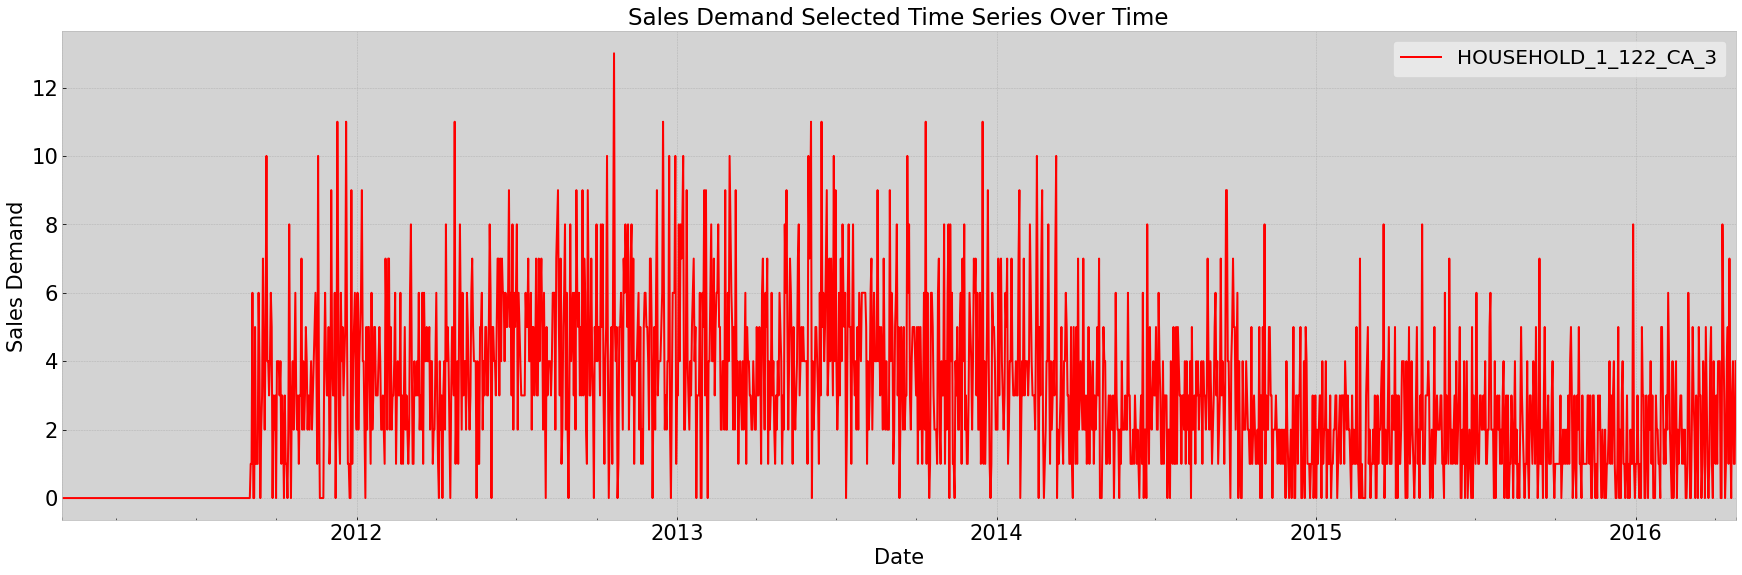

In [ ]:
#Select arbitrary index and plot the time series
index = 6780
y = pd.DataFrame(DF_Sales.iloc[:,index])
y = pd.DataFrame(y).set_index([dates_list])
TS_selected = y 
y.index = pd.to_datetime(y.index)
ax = y.plot(figsize=(30, 9),color='red')
ax.set_facecolor('lightgrey')
plt.xticks(fontsize=21 )
plt.yticks(fontsize=21 )
plt.legend(fontsize=20)
plt.title(label = 'Sales Demand Selected Time Series Over Time',fontsize = 23)
plt.ylabel(ylabel = 'Sales Demand',fontsize = 21)
plt.xlabel(xlabel = 'Date',fontsize = 21)
plt.show()

In [ ]:
SEED = 1345
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(SEED)

In [ ]:
data = np.array(y)
scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(data.reshape(-1, 1))

In [ ]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
[[-0.53846154]
 [-0.38461538]
 [-0.84615385]
 [-0.84615385]
 [-0.38461538]]


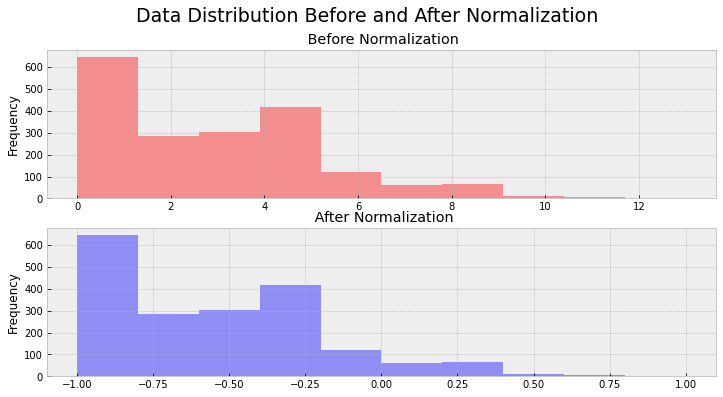

In [ ]:
fig, axs = plt.subplots(2)
 
fig.suptitle('Data Distribution Before and After Normalization ',fontsize = 19)
pd.DataFrame(data).plot(kind='hist',ax = axs[0] , alpha=.4 , figsize=[12,6], legend = False,title = ' Before Normalization',color ='red') 
pd.DataFrame(train_data_normalized).plot(kind='hist', ax = axs[1] ,figsize=[12,6], alpha=.4 , legend = False,title = ' After Normalization'\
                                         ,color = 'blue')
   

In [ ]:

###  This function creates a sliding window or sequences of 28 days and one day label ####
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [ ]:
#train_inout_seq = create_inout_sequences(train_data_normalized, train_window)
seq_length = 28
x, y = sliding_windows(train_data_normalized, seq_length)
print(x.shape)
print(y.shape)

(1884, 28, 1)
(1884, 1)


In [ ]:
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [ ]:
print("train shape is:",trainX.size())
print("train label shape is:",trainY.size())
print("test shape is:",testX.size())
print("test label shape is:",testY.size())

train shape is: torch.Size([1262, 28, 1])
train label shape is: torch.Size([1262, 1])
test shape is: torch.Size([622, 28, 1])
test label shape is: torch.Size([622, 1])


In [ ]:
class LSTM2(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM2, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.batch_size = 1
        #self.seq_length = seq_length
        
        self.LSTM2 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers,batch_first=True,dropout = 0.25)
       
        
        
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(p=0.2)
    def forward(self, x):
        h_1 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size).to(device))
         
        
        c_1 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size).to(device))
        
       
        _, (hn, cn) = self.LSTM2(x, (h_1, c_1))
     
        #print("hidden state shpe is:",hn.size())
        y = hn.view(-1, self.hidden_size)
        
        final_state = hn.view(self.num_layers, x.size(0), self.hidden_size)[-1]
        #print("final state shape is:",final_state.shape)
        out = self.fc(final_state)
        #out = self.dropout(out)
        #print(out.size())
        return out


In [ ]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param.data, -0.08, 0.08)
        

In [ ]:
num_epochs = 700
learning_rate = 1e-3
input_size = 1
hidden_size = 512
num_layers = 2

num_classes = 1

lstm = LSTM2(num_classes, input_size, hidden_size, num_layers)
lstm.to(device)


lstm.apply(init_weights)

criterion = torch.nn.MSELoss().to(device)    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate,weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,  patience=100, factor =0.5 ,min_lr=1e-7, eps=1e-08)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model

for epoch in progress_bar(range(num_epochs)): 
    lstm.train()
    outputs = lstm(trainX.to(device))
    optimizer.zero_grad()
    torch.nn.utils.clip_grad_norm_(lstm.parameters(), 1)
    # obtain the loss function
    loss = criterion(outputs, trainY.to(device))
    
    loss.backward()
    
    scheduler.step(loss)
    optimizer.step()
    lstm.eval()
    valid = lstm(testX.to(device))
    vall_loss = criterion(valid, testY.to(device))
    scheduler.step(vall_loss)
    
    if epoch % 50 == 0:
      print("Epoch: %d, loss: %1.5f valid loss:  %1.5f " %(epoch, loss.cpu().item(),vall_loss.cpu().item()))

Epoch: 0, loss: 0.37445 valid loss:  0.06945 
Epoch: 50, loss: 0.10199 valid loss:  0.07240 
Epoch: 100, loss: 0.09949 valid loss:  0.06880 
Epoch: 150, loss: 0.09718 valid loss:  0.07058 
Epoch: 200, loss: 0.09578 valid loss:  0.07096 
Epoch: 250, loss: 0.09466 valid loss:  0.07123 
Epoch: 300, loss: 0.09364 valid loss:  0.07175 
Epoch: 350, loss: 0.09299 valid loss:  0.07168 
Epoch: 400, loss: 0.09270 valid loss:  0.07165 
Epoch: 450, loss: 0.09331 valid loss:  0.07164 
Epoch: 500, loss: 0.09268 valid loss:  0.07160 
Epoch: 550, loss: 0.09319 valid loss:  0.07162 
Epoch: 600, loss: 0.09270 valid loss:  0.07160 
Epoch: 650, loss: 0.09283 valid loss:  0.07160 


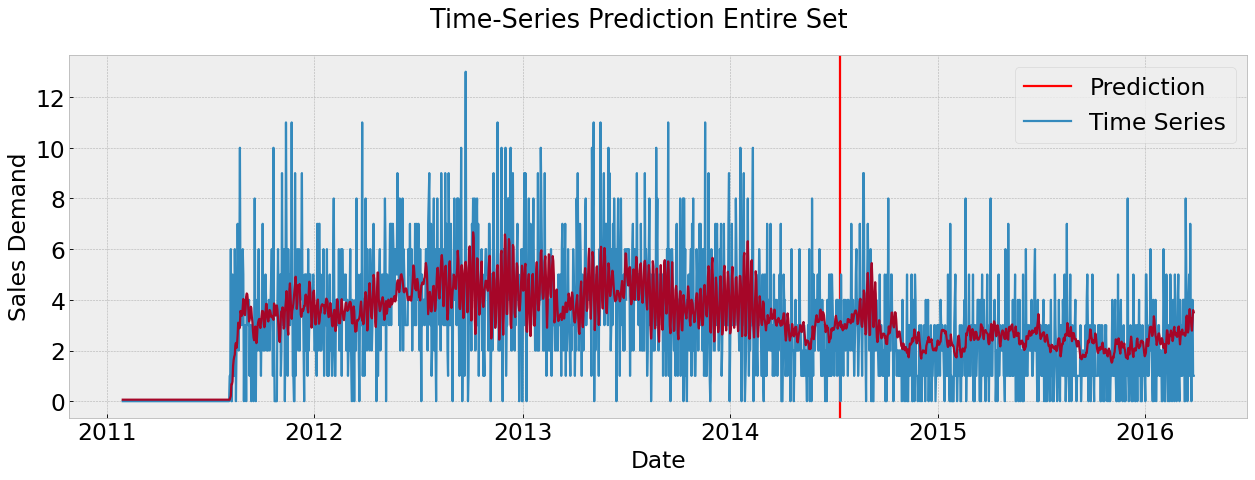

In [ ]:
######Prediction###############


lstm.eval()
train_predict = lstm(dataX.to(device))
data_predict = train_predict.cpu().data.numpy()
dataY_plot = dataY.data.numpy()

## Inverse Normalize 
data_predict = scaler.inverse_transform(data_predict)
dataY_plot = scaler.inverse_transform(dataY_plot)

## Add dates
df_predict = pd.DataFrame(data_predict)
df_predict = df_predict.set_index([dates_list[:-29]])
df_labels = pd.DataFrame(dataY_plot)
df_labels = df_labels.set_index([dates_list[:-29]])

# Plot 
figure(num=None, figsize=(19, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axvline(x=dates_list[train_size], c='r')
plt.plot( df_labels[0])
plt.plot(df_predict[0])
plt.legend(['Prediction','Time Series'],fontsize = 21)
plt.suptitle('Time-Series Prediction Entire Set',fontsize = 23)
plt.xticks(fontsize=21 )
plt.yticks(fontsize=21 )
plt.ylabel(ylabel = 'Sales Demand',fontsize = 21)
plt.xlabel(xlabel = 'Date',fontsize = 21)
plt.show()

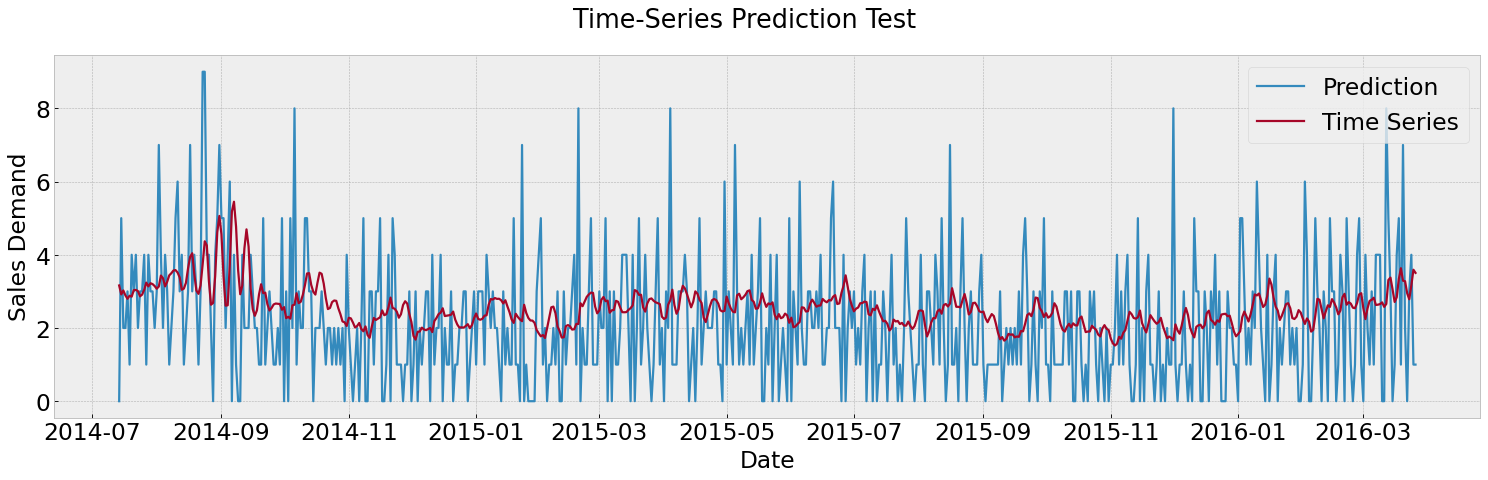

In [ ]:
#######Plot the test set ##########################
figure(num=None, figsize=(23, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_labels.iloc[-testX.size()[0]:][0])
plt.plot(df_predict.iloc[-testX.size()[0]:][0])
plt.legend(['Prediction','Time Series'],fontsize = 21)
plt.suptitle('Time-Series Prediction Test',fontsize = 23)
plt.xticks(fontsize=21 )
plt.yticks(fontsize=21 )
plt.ylabel(ylabel = 'Sales Demand',fontsize = 21)
plt.xlabel(xlabel = 'Date',fontsize = 21)
plt.show()

In [ ]:
np.sqrt(((dataY_plot[-testX.size()[0]:] - data_predict[-testX.size()[0]:] ) ** 2).mean())

1.7392663

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(dataY_plot,data_predict))

0.3561461734361747
